In [1]:
#!pip install opendatasets
#!pip install torchmetrics
import gc
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import lightgbm as lgb
import torch
import scipy
import opendatasets as od
import math
import torchmetrics
import matplotlib.pyplot as plt

import importlib
import joblib
import utils.mlp as mlp
import utils.lgbm as lgbm
import utils.mlp_pipeline as mlp_pipeline
#from google.colab import drive

In [2]:
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)


In [3]:
def find_optimal_recall(fpr,tpr,threshold,rate):
    optimal_index=np.argmin(abs(fpr-rate*np.ones(len(fpr))))
    
    return tpr[optimal_index]

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using {device} device")

Using cpu device


In [5]:

data1=pd.read_csv("./creditcardfraud/creditcard.csv")
X=data1.loc[:,'V1':'Amount']
Y=data1.Class

training_range=range(0,math.floor(len(Y)*0.8)-1)
val_range=range(math.floor(len(Y)*0.8),math.floor(len(Y)*0.9)-1)
test_range=range(math.floor(len(Y)*0.9),len(Y)-1)
xtrain=X.loc[training_range]
ytrain=Y.loc[training_range]
xval=X.loc[val_range]
yval=Y.loc[val_range]
xtest=X.loc[test_range]
ytest=Y.loc[test_range]

In [6]:
cont_cols=xtrain.columns
cat_cols=[]
param_list=lgbm.lgbm_param_sampler(20,7,'cpu')


In [34]:

param_list=lgbm.lgbm_param_sampler(20,7,'cpu')

i=0
for params in param_list:
    model = lgb.LGBMClassifier(n_jobs=10, **params)  # Instantiate LGBM Model.
        
    # Fit model to training data.
    model.fit(xtrain, ytrain, categorical_feature=cat_cols,eval_set=[(xval,yval)],early_stopping_rounds=5,eval_metric='loss')
    # Obtain predictions in test data.
    predictions = model.predict_proba(xtest)[:, 1]

    joblib.dump(model,'lgbm_1/lgbm{}.pkl'.format(i))
    i=i+1

i=0


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.00494402
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0337606
[3]	valid_0's binary_logloss: 0.00453525
[4]	valid_0's binary_logloss: 0.0044562
[5]	valid_0's binary_logloss: 0.00444678
[6]	valid_0's binary_logloss: 0.00443659
[7]	valid_0's binary_logloss: 0.00437446
[8]	valid_0's binary_logloss: 0.00591772
[9]	valid_0's binary_logloss: 0.00590792
[10]	valid_0's binary_logloss: 0.0058338
[11]	valid_0's binary_logloss: 0.00571575
[12]	valid_0's binary_logloss: 0.00567793
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.00437446
[LightGBM] [Warning] min_data_in_leaf is set=147, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=147


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0597072
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0300187
[3]	valid_0's binary_logloss: 0.0252377
[4]	valid_0's binary_logloss: 0.02799
[5]	valid_0's binary_logloss: 0.0443005
[6]	valid_0's binary_logloss: 0.0948702
[7]	valid_0's binary_logloss: 0.0555062
[8]	valid_0's binary_logloss: 0.200245
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.0252377


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=141, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=141
[1]	valid_0's binary_logloss: 0.00750241
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0191287
[3]	valid_0's binary_logloss: 0.0125724
[4]	valid_0's binary_logloss: 0.0123908
[5]	valid_0's binary_logloss: 0.0122809
[6]	valid_0's binary_logloss: 0.0121643
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.00750241
[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0182683
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0240116
[3]	valid_0's binary_logloss: 0.0265818
[4]	valid_0's binary_logloss: 0.0615138
[5]	valid_0's binary_logloss: 0.0532199
[6]	valid_0's binary_logloss: 0.0623121
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0182683
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.00563848
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0211639
[3]	valid_0's binary_logloss: 0.0138249
[4]	valid_0's binary_logloss: 0.0184835
[5]	valid_0's binary_logloss: 0.0175693
[6]	valid_0's binary_logloss: 0.0202893
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.00563848


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[1]	valid_0's binary_logloss: 0.0126039
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.051592
[3]	valid_0's binary_logloss: 0.0296058
[4]	valid_0's binary_logloss: 0.0246974
[5]	valid_0's binary_logloss: 0.0267759
[6]	valid_0's binary_logloss: 0.025605
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0126039
[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.00543657
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.00518011
[3]	valid_0's binary_logloss: 0.00502936
[4]	valid_0's binary_logloss: 0.00492524
[5]	valid_0's binary_logloss: 0.00479241
[6]	valid_0's binary_logloss: 0.00467893
[7]	valid_0's binary_logloss: 0.00459221
[8]	valid_0's binary_logloss: 0.00450852
[9]	valid_0's binary_logloss: 0.0044389
[10]	valid_0's binary_logloss: 0.00436181
[11]	valid_0's binary_logloss: 0.00430773
[12]	valid_0's binary_logloss: 0.00424369
[13]	valid_0's binary_logloss: 0.00418057
[14]	valid_0's binary_logloss: 0.00413333
[15]	valid_0's binary_logloss: 0.00410172
[16]	valid_0's binary_logloss: 0.00407098
[17]	valid_0's binary_logloss: 0.00403876
[18]	valid_0's binary_logloss: 0.00399814
[19]	valid_0's binary_logloss: 0.00396465
[20]	valid_0's binary_logloss: 0.0039052
[21]	valid_0's binary_logloss: 0.00387824
[22]	valid_0's binary_logloss: 0.00383071
[23]	valid_0's binary_loglo

C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[1]	valid_0's binary_logloss: 0.0164531
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0441021
[3]	valid_0's binary_logloss: 0.0193474
[4]	valid_0's binary_logloss: 0.0237714
[5]	valid_0's binary_logloss: 0.0321926
[6]	valid_0's binary_logloss: 0.0289903
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0164531
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.00851408
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0486901
[3]	valid_0's binary_logloss: 0.049696
[4]	valid_0's binary_logloss: 0.0216592
[5]	valid_0's binary_logloss: 0.0214661
[6]	valid_0's binary_logloss: 0.0213329
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.00851408


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[1]	valid_0's binary_logloss: 0.0123507
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0514001
[3]	valid_0's binary_logloss: 0.0518846
[4]	valid_0's binary_logloss: 0.0376715
[5]	valid_0's binary_logloss: 0.0379885
[6]	valid_0's binary_logloss: 0.0382405
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0123507
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0449233
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0537836
[3]	valid_0's binary_logloss: 0.0693577
[4]	valid_0's binary_logloss: 0.0704519
[5]	valid_0's binary_logloss: 0.0497866
[6]	valid_0's binary_logloss: 0.200547
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0449233


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[1]	valid_0's binary_logloss: 0.0175993
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0429924
[3]	valid_0's binary_logloss: 0.0128387
[4]	valid_0's binary_logloss: 0.0237248
[5]	valid_0's binary_logloss: 0.0240546
[6]	valid_0's binary_logloss: 0.0302174
[7]	valid_0's binary_logloss: 0.0393513
[8]	valid_0's binary_logloss: 0.0310065
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.0128387


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=154, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=154
[1]	valid_0's binary_logloss: 0.0189816
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0392145
[3]	valid_0's binary_logloss: 0.0091751
[4]	valid_0's binary_logloss: 0.0105772
[5]	valid_0's binary_logloss: 0.0107792
[6]	valid_0's binary_logloss: 0.0103527
[7]	valid_0's binary_logloss: 0.0130503
[8]	valid_0's binary_logloss: 0.0119621
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.0091751


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[1]	valid_0's binary_logloss: 0.00874039
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0247916
[3]	valid_0's binary_logloss: 0.0178195
[4]	valid_0's binary_logloss: 0.0173639
[5]	valid_0's binary_logloss: 0.0213222
[6]	valid_0's binary_logloss: 0.0267702
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.00874039
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0425628
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0393975
[3]	valid_0's binary_logloss: 0.0262623
[4]	valid_0's binary_logloss: 0.0561857
[5]	valid_0's binary_logloss: 0.0438335
[6]	valid_0's binary_logloss: 0.120576
[7]	valid_0's binary_logloss: 0.0882736
[8]	valid_0's binary_logloss: 0.15693
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.0262623


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=132, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=132
[1]	valid_0's binary_logloss: 0.0640117
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.055482
[3]	valid_0's binary_logloss: 0.0702366
[4]	valid_0's binary_logloss: 0.0608077
[5]	valid_0's binary_logloss: 0.0462539
[6]	valid_0's binary_logloss: 0.213262
[7]	valid_0's binary_logloss: 0.0423452
[8]	valid_0's binary_logloss: 0.0487061
[9]	valid_0's binary_logloss: 0.0769684
[10]	valid_0's binary_logloss: 0.158726
[11]	valid_0's binary_logloss: 0.229583
[12]	valid_0's binary_logloss: 0.363526
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.0423452


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[1]	valid_0's binary_logloss: 0.0453218
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0644814
[3]	valid_0's binary_logloss: 0.0816991
[4]	valid_0's binary_logloss: 0.0742034
[5]	valid_0's binary_logloss: 0.119066
[6]	valid_0's binary_logloss: 0.0963488
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0453218


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[1]	valid_0's binary_logloss: 0.0243752
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0329627
[3]	valid_0's binary_logloss: 0.0259451
[4]	valid_0's binary_logloss: 0.0291736
[5]	valid_0's binary_logloss: 0.0293358
[6]	valid_0's binary_logloss: 0.0326709
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0243752
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0224441
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0466783
[3]	valid_0's binary_logloss: 0.045864
[4]	valid_0's binary_logloss: 0.0917572
[5]	valid_0's binary_logloss: 0.0756179
[6]	valid_0's binary_logloss: 0.0875328
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0224441
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0729119
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0718231
[3]	valid_0's binary_logloss: 0.170221
[4]	valid_0's binary_logloss: 0.19521
[5]	valid_0's binary_logloss: 0.160646
[6]	valid_0's binary_logloss: 0.155881
[7]	valid_0's binary_logloss: 0.144402
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.0718231


In [58]:
encoder=data.PiecewiseLinearEncoder('decision_tree',dict(n_bins=4,regression='False', tree_kwargs={'min_samples_leaf': 256}),stack=False)
encoder.fit(torch.tensor(xtrain.values),torch.tensor(ytrain.values)) #the device count fraud feature is constant, and so cannot be fed to this encoder
x_train=encoder.transform(torch.tensor(xtrain.values))
x_val=encoder.transform(torch.tensor(xval.values))
i=0
for params in param_list:
    model = lgb.LGBMClassifier(n_jobs=10, **params)  # Instantiate LGBM Model.
        
    # Fit model to training data.
    model.fit(x_train, ytrain, categorical_feature=cat_cols,eval_set=[(x_val,yval)],early_stopping_rounds=5,eval_metric='loss')

    joblib.dump(model,'lgbm_1/lgbm_numenc{}.pkl'.format(i))
    i=i+1

C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[1]	valid_0's binary_logloss: 0.0138539
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0501145
[3]	valid_0's binary_logloss: 0.0204207
[4]	valid_0's binary_logloss: 0.0200215
[5]	valid_0's binary_logloss: 0.0198108
[6]	valid_0's binary_logloss: 0.019625
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0138539


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0333717
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0589799
[3]	valid_0's binary_logloss: 0.0447813
[4]	valid_0's binary_logloss: 0.0387237
[5]	valid_0's binary_logloss: 0.0382647
[6]	valid_0's binary_logloss: 0.0393684
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0333717


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0155367
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.028611
[3]	valid_0's binary_logloss: 0.0368669
[4]	valid_0's binary_logloss: 0.030905
[5]	valid_0's binary_logloss: 0.0296163
[6]	valid_0's binary_logloss: 0.0255544
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0155367


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0280089
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0551653
[3]	valid_0's binary_logloss: 0.0833188
[4]	valid_0's binary_logloss: 0.0752395
[5]	valid_0's binary_logloss: 0.0782571
[6]	valid_0's binary_logloss: 0.80223
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0280089


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.00610816
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.00875871
[3]	valid_0's binary_logloss: 0.00880149
[4]	valid_0's binary_logloss: 0.00969428
[5]	valid_0's binary_logloss: 0.00889965
[6]	valid_0's binary_logloss: 0.00879615
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.00610816


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0246541
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.059746
[3]	valid_0's binary_logloss: 0.051832
[4]	valid_0's binary_logloss: 0.0489038
[5]	valid_0's binary_logloss: 0.0555461
[6]	valid_0's binary_logloss: 0.0858439
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0246541


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.00802795
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.00756016
[3]	valid_0's binary_logloss: 0.00710853
[4]	valid_0's binary_logloss: 0.00679553
[5]	valid_0's binary_logloss: 0.00655597
[6]	valid_0's binary_logloss: 0.00636474
[7]	valid_0's binary_logloss: 0.00621862
[8]	valid_0's binary_logloss: 0.00605614
[9]	valid_0's binary_logloss: 0.0059098
[10]	valid_0's binary_logloss: 0.00578189
[11]	valid_0's binary_logloss: 0.00570349
[12]	valid_0's binary_logloss: 0.00558256
[13]	valid_0's binary_logloss: 0.00549266
[14]	valid_0's binary_logloss: 0.00541603
[15]	valid_0's binary_logloss: 0.00531508
[16]	valid_0's binary_logloss: 0.00522238
[17]	valid_0's binary_logloss: 0.00513292
[18]	valid_0's binary_logloss: 0.00504425
[19]	valid_0's binary_logloss: 0.0049667
[20]	valid_0's binary_logloss: 0.00489772
[21]	valid_0's binary_logloss: 0.00482796
[22]	valid_0's binary_logloss: 0.00476806
[23]	valid_0's binary_loglo

C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0268144
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0503157
[3]	valid_0's binary_logloss: 0.014699
[4]	valid_0's binary_logloss: 0.0428071
[5]	valid_0's binary_logloss: 0.0421157
[6]	valid_0's binary_logloss: 0.046261
[7]	valid_0's binary_logloss: 0.0448167
[8]	valid_0's binary_logloss: 0.0458756
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.014699


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0216717
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0511591
[3]	valid_0's binary_logloss: 0.0526417
[4]	valid_0's binary_logloss: 0.0399928
[5]	valid_0's binary_logloss: 0.036921
[6]	valid_0's binary_logloss: 0.0365446
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0216717


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.02285
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0559307
[3]	valid_0's binary_logloss: 0.00896918
[4]	valid_0's binary_logloss: 0.010325
[5]	valid_0's binary_logloss: 0.0104876
[6]	valid_0's binary_logloss: 0.0112984
[7]	valid_0's binary_logloss: 0.011172
[8]	valid_0's binary_logloss: 0.0125853
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.00896918


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0408224
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0581983
[3]	valid_0's binary_logloss: 0.103541
[4]	valid_0's binary_logloss: 0.0592587
[5]	valid_0's binary_logloss: 0.0665034
[6]	valid_0's binary_logloss: 0.0361333
[7]	valid_0's binary_logloss: 0.212808
[8]	valid_0's binary_logloss: 0.0492968
[9]	valid_0's binary_logloss: 0.104095
[10]	valid_0's binary_logloss: 0.442245
[11]	valid_0's binary_logloss: 0.110552
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0361333


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0271995
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0624083
[3]	valid_0's binary_logloss: 0.0563412
[4]	valid_0's binary_logloss: 0.0692655
[5]	valid_0's binary_logloss: 0.0704778
[6]	valid_0's binary_logloss: 0.0808474
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0271995


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0223109
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0560164
[3]	valid_0's binary_logloss: 0.0160627
[4]	valid_0's binary_logloss: 0.0158067
[5]	valid_0's binary_logloss: 0.0156085
[6]	valid_0's binary_logloss: 0.0130504
[7]	valid_0's binary_logloss: 0.011565
[8]	valid_0's binary_logloss: 0.0112413
[9]	valid_0's binary_logloss: 0.0107731
[10]	valid_0's binary_logloss: 0.0110501
[11]	valid_0's binary_logloss: 0.0105315
[12]	valid_0's binary_logloss: 0.0103345
[13]	valid_0's binary_logloss: 0.0103421
[14]	valid_0's binary_logloss: 0.0101378
[15]	valid_0's binary_logloss: 0.00984976
[16]	valid_0's binary_logloss: 0.00975712
[17]	valid_0's binary_logloss: 0.00968827
[18]	valid_0's binary_logloss: 0.0098567
[19]	valid_0's binary_logloss: 0.00979162
[20]	valid_0's binary_logloss: 0.00971277
[21]	valid_0's binary_logloss: 0.0096484
[22]	valid_0's binary_logloss: 0.00960435
[23]	valid_0's binary_logloss: 0.00953469


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0182986
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0582383
[3]	valid_0's binary_logloss: 0.0275599
[4]	valid_0's binary_logloss: 0.0273511
[5]	valid_0's binary_logloss: 0.0169558
[6]	valid_0's binary_logloss: 0.0145447
[7]	valid_0's binary_logloss: 0.0299623
[8]	valid_0's binary_logloss: 0.0223886
[9]	valid_0's binary_logloss: 0.0285849
[10]	valid_0's binary_logloss: 0.0220945
[11]	valid_0's binary_logloss: 0.0522396
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0145447


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0514724
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0636729
[3]	valid_0's binary_logloss: 0.0614285
[4]	valid_0's binary_logloss: 0.0618157
[5]	valid_0's binary_logloss: 0.0745551
[6]	valid_0's binary_logloss: 0.103864
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0514724


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0562777
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0604132
[3]	valid_0's binary_logloss: 0.0849858
[4]	valid_0's binary_logloss: 0.0985471
[5]	valid_0's binary_logloss: 0.14247
[6]	valid_0's binary_logloss: 0.254859
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0562777


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0570121
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0727793
[3]	valid_0's binary_logloss: 0.0766005
[4]	valid_0's binary_logloss: 0.091357
[5]	valid_0's binary_logloss: 0.0940959
[6]	valid_0's binary_logloss: 0.192515
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0570121


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0234186
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0504337
[3]	valid_0's binary_logloss: 0.0254688
[4]	valid_0's binary_logloss: 0.0220285
[5]	valid_0's binary_logloss: 0.0240029
[6]	valid_0's binary_logloss: 0.0363634
[7]	valid_0's binary_logloss: 0.0617891
[8]	valid_0's binary_logloss: 0.036688
[9]	valid_0's binary_logloss: 0.0323301
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.0220285


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0334604
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0581983
[3]	valid_0's binary_logloss: 0.0641934
[4]	valid_0's binary_logloss: 0.0443424
[5]	valid_0's binary_logloss: 0.0314668
[6]	valid_0's binary_logloss: 0.0631259
[7]	valid_0's binary_logloss: 0.045028
[8]	valid_0's binary_logloss: 0.0503079
[9]	valid_0's binary_logloss: 0.0861054
[10]	valid_0's binary_logloss: 0.12461
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.0314668


C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ritas\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.0627676
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0699977
[3]	valid_0's binary_logloss: 0.113789
[4]	valid_0's binary_logloss: 0.121046
[5]	valid_0's binary_logloss: 0.167129
[6]	valid_0's binary_logloss: 0.180216
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0627676


iteration:  0
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


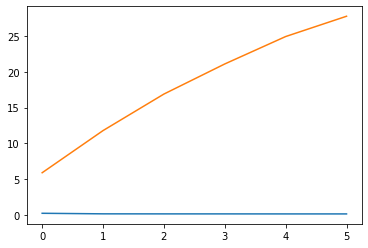

iteration:  1
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


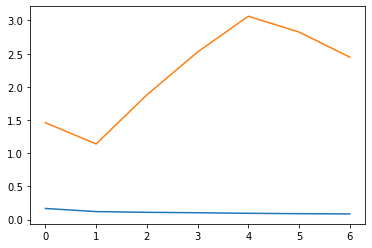

iteration:  2
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


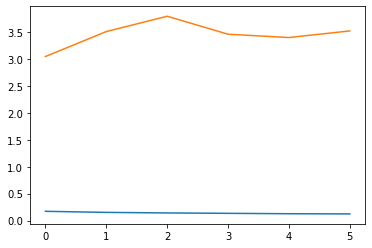

iteration:  3
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


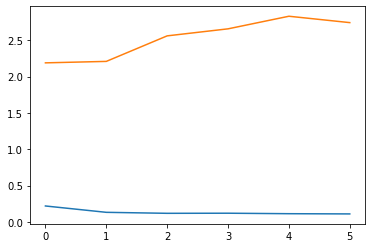

iteration:  4
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


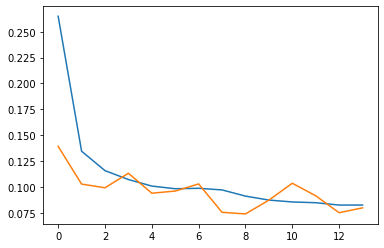

iteration:  5
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


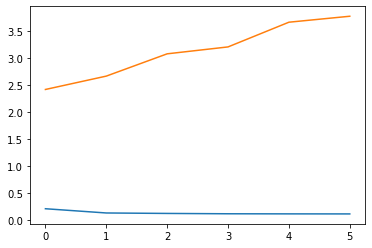

iteration:  6
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


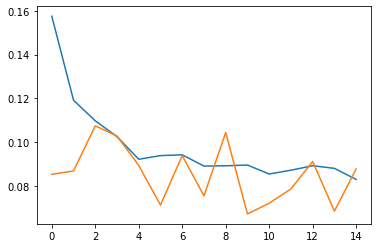

iteration:  7
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5


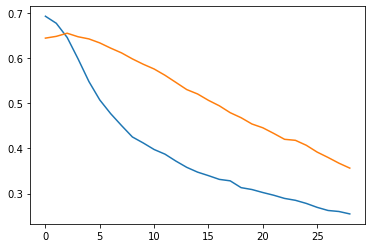

iteration:  8
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


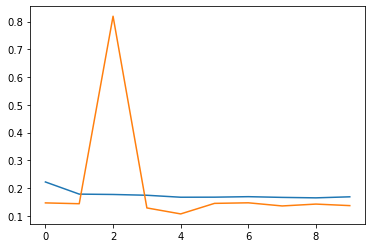

iteration:  9
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


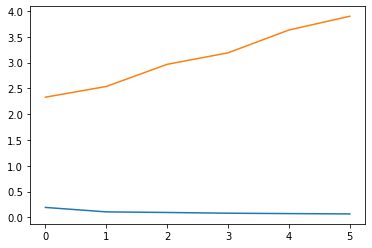

iteration:  10
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


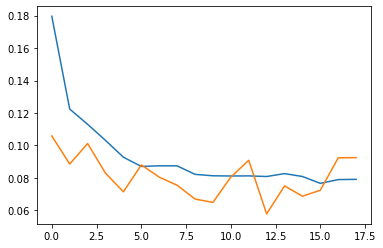

iteration:  11
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


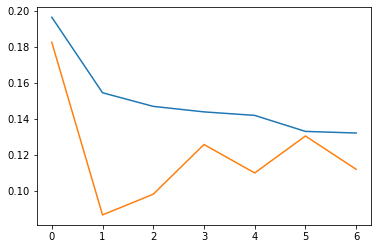

iteration:  12
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


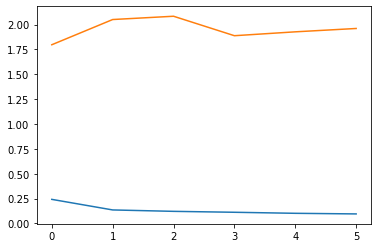

iteration:  13
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


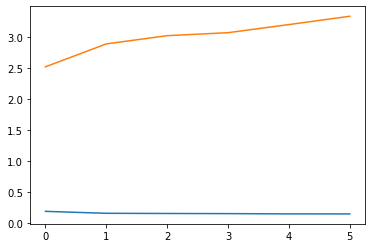

iteration:  14
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


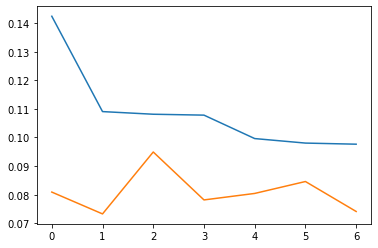

iteration:  15
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


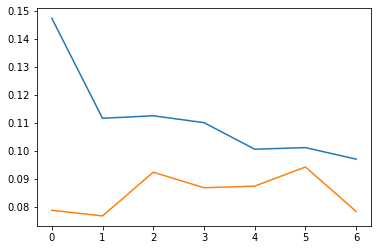

iteration:  16
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


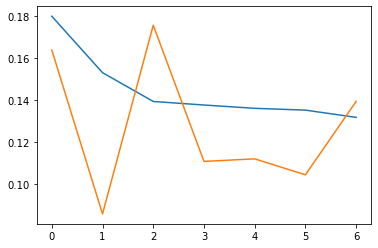

iteration:  17
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


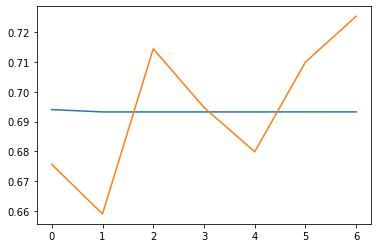

iteration:  0
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


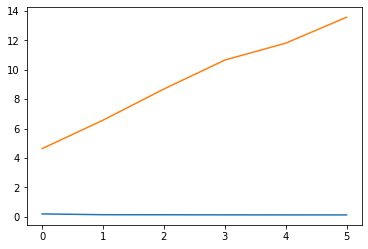

iteration:  1
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


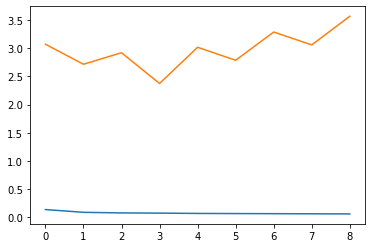

iteration:  2
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


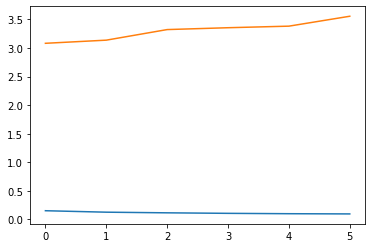

iteration:  3
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


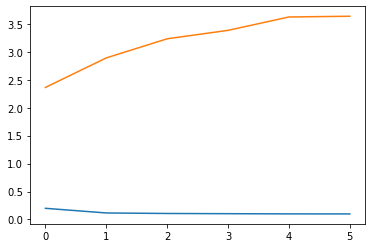

iteration:  4
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


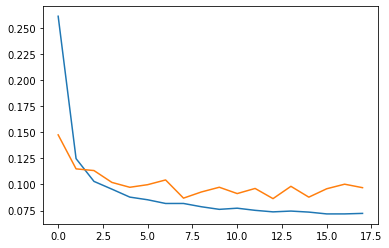

iteration:  5
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


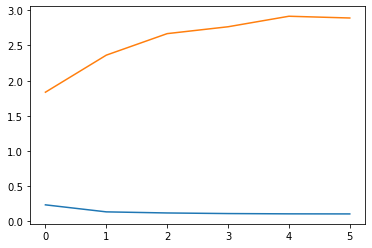

iteration:  6
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


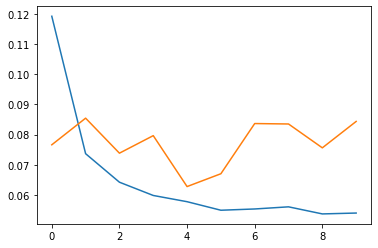

iteration:  7
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5


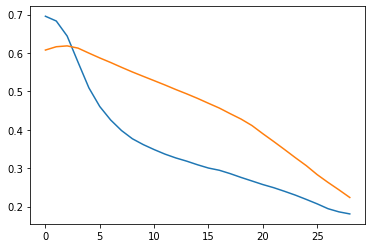

iteration:  8
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


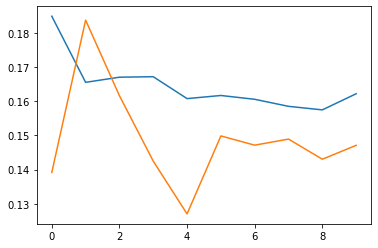

iteration:  9
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


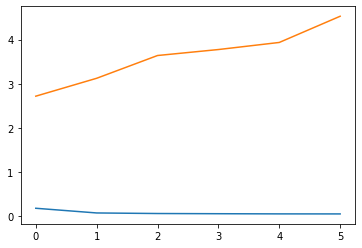

iteration:  10
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


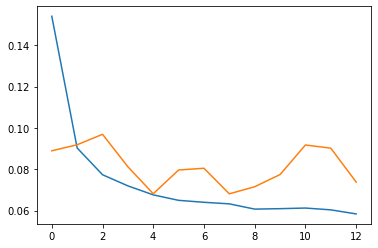

iteration:  11
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


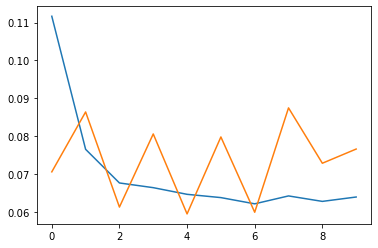

iteration:  12
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


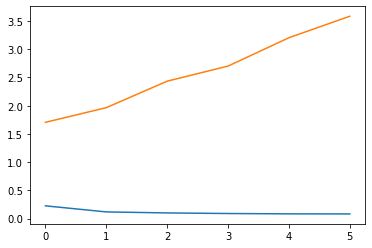

iteration:  13
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


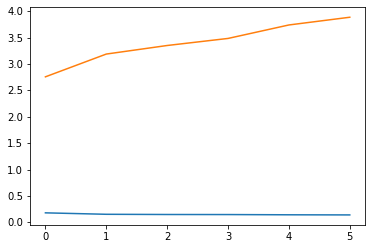

iteration:  14
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


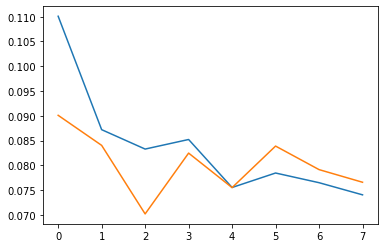

iteration:  15
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


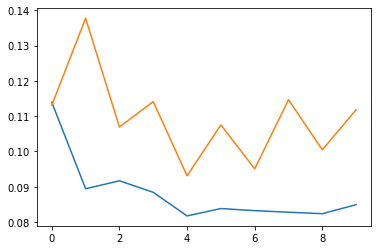

iteration:  16
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


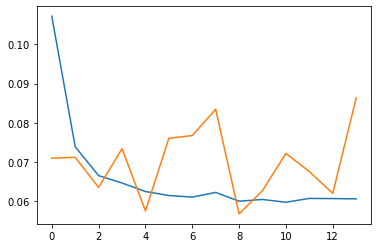

iteration:  17
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


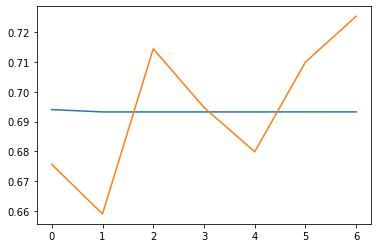

iteration:  0
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


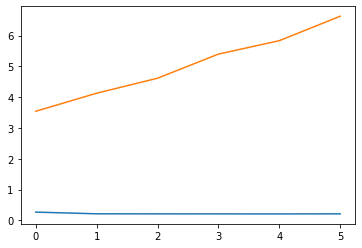

iteration:  1
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


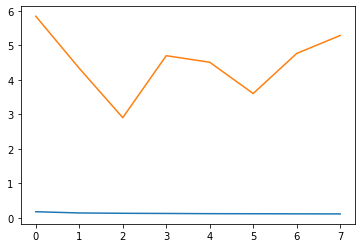

iteration:  2
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


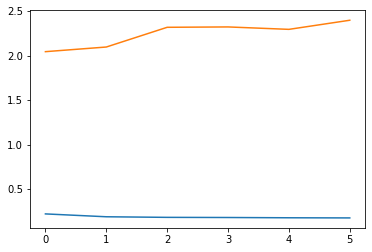

iteration:  3
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


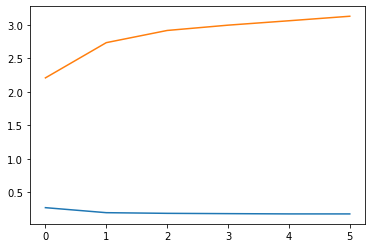

iteration:  4
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


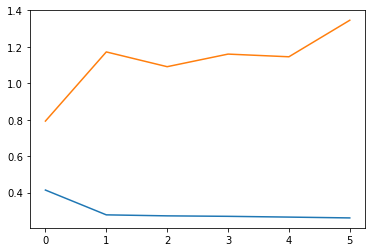

iteration:  5
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


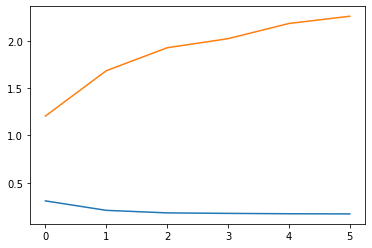

iteration:  6
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


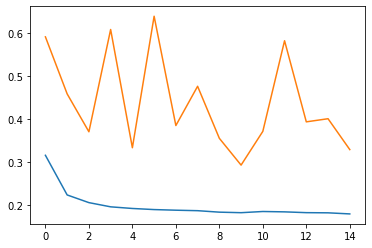

iteration:  7
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


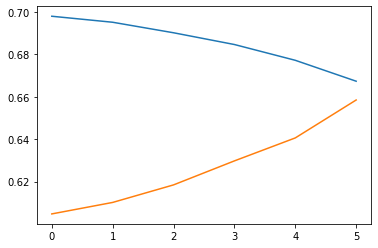

iteration:  8
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


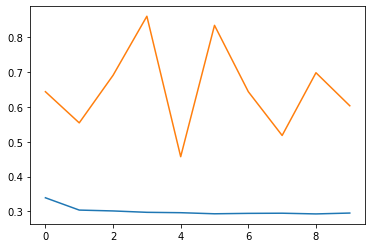

iteration:  9
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


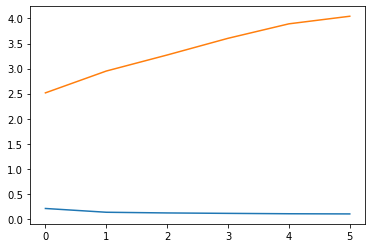

iteration:  10
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


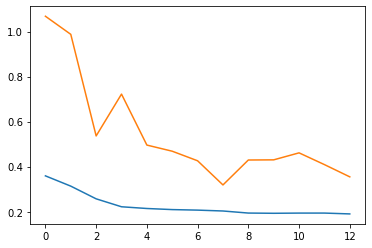

iteration:  11
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


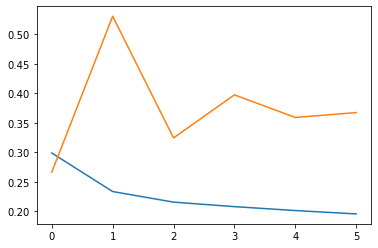

iteration:  12
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


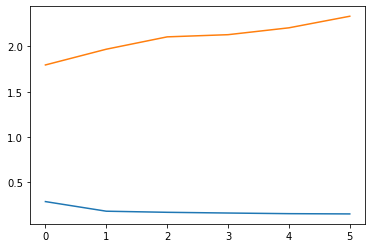

iteration:  13
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


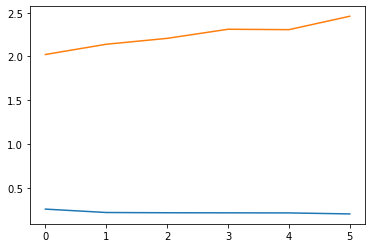

iteration:  14
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


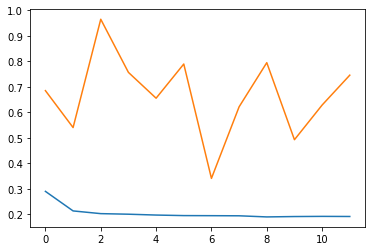

iteration:  15
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


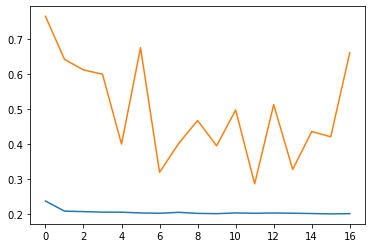

iteration:  16
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


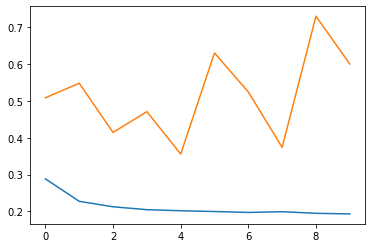

iteration:  17
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


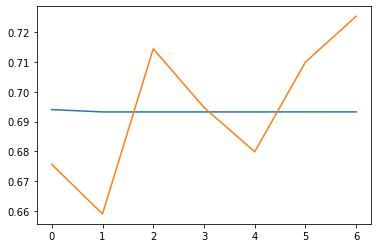

iteration:  0
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


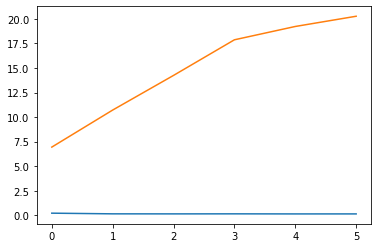

iteration:  1
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


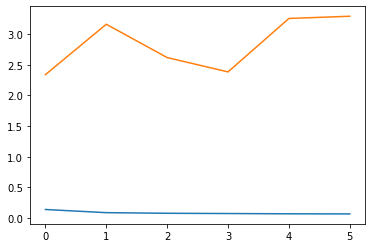

iteration:  2
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


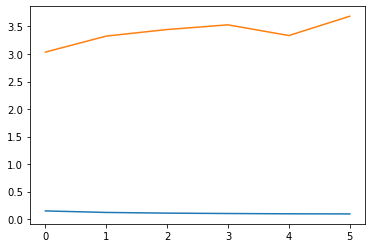

iteration:  3
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


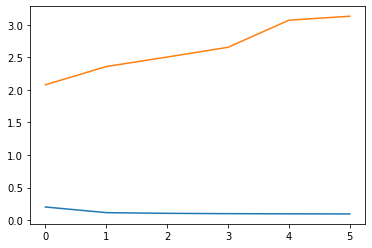

iteration:  4
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


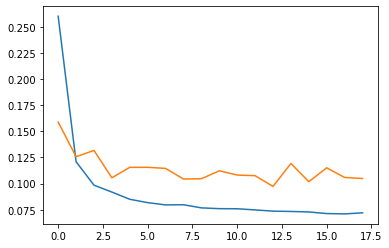

iteration:  5
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


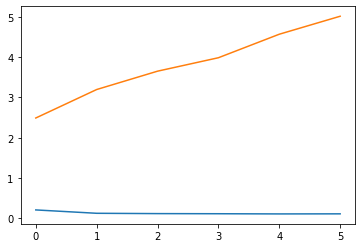

iteration:  6
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


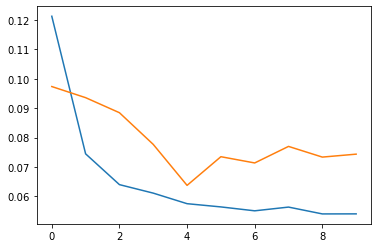

iteration:  7
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5


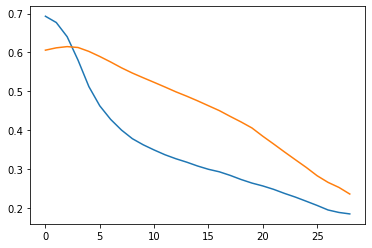

iteration:  8
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


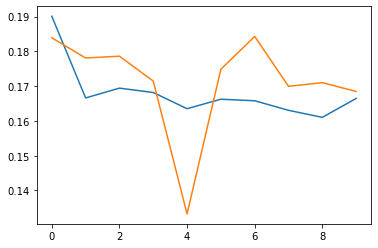

iteration:  9
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


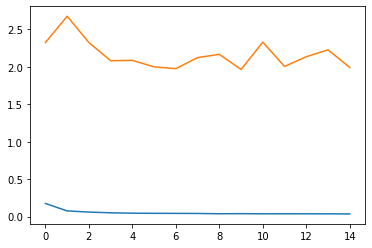

iteration:  10
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


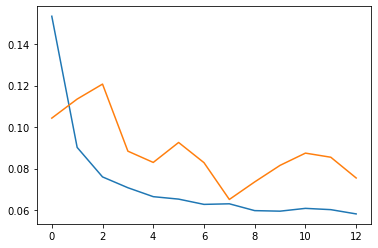

iteration:  11
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


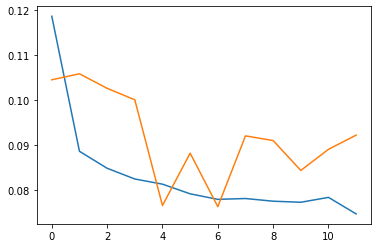

iteration:  12
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


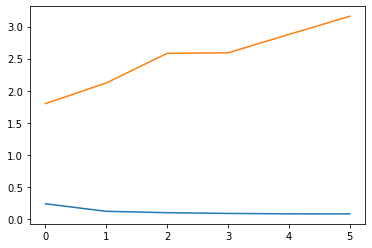

iteration:  13
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


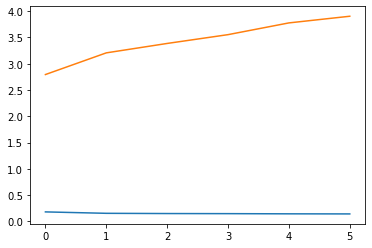

iteration:  14
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


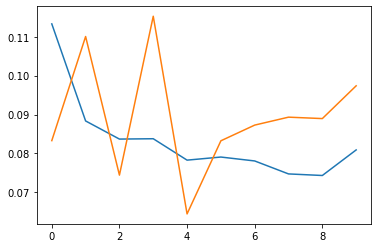

iteration:  15
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


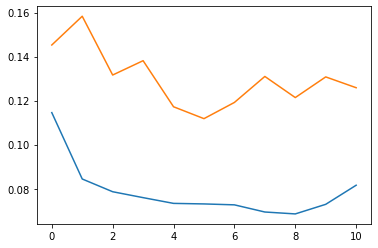

iteration:  16
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


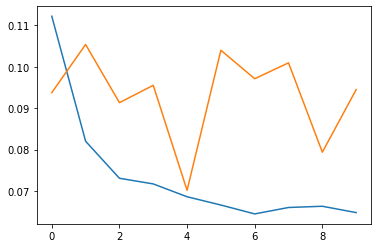

iteration:  17
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


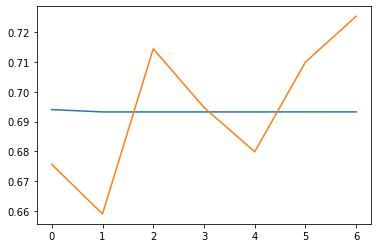

iteration:  0
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


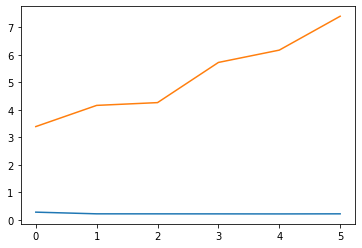

iteration:  1
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


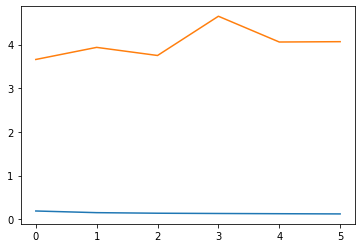

iteration:  2
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


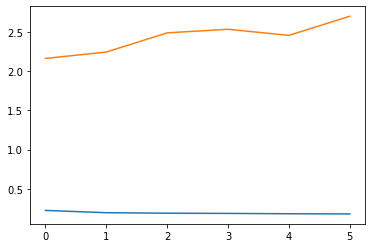

iteration:  3
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


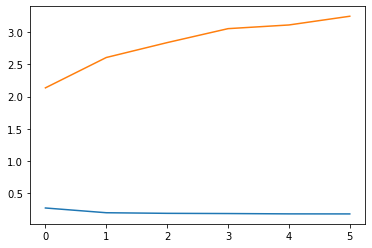

iteration:  4
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


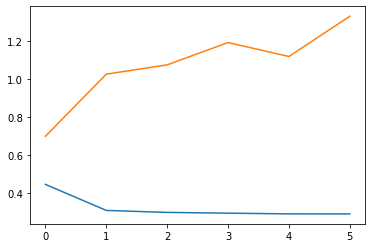

iteration:  5
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


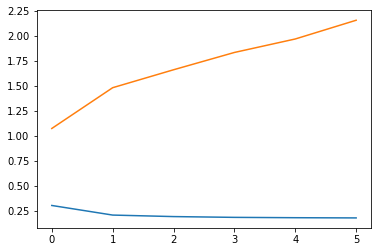

iteration:  6
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


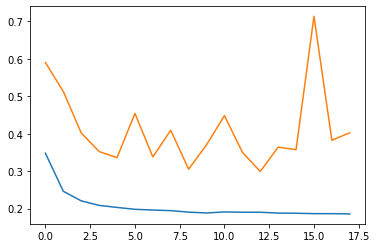

iteration:  7
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


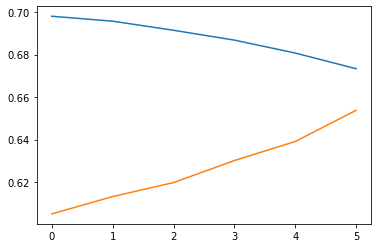

iteration:  8
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


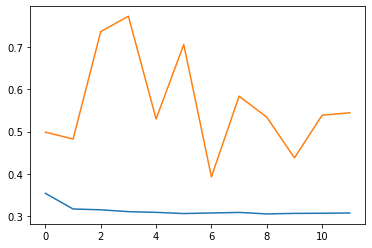

iteration:  9
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


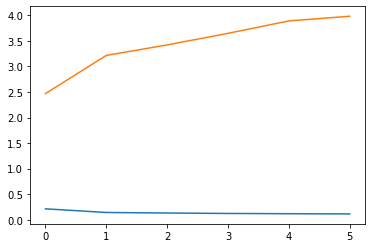

iteration:  10
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


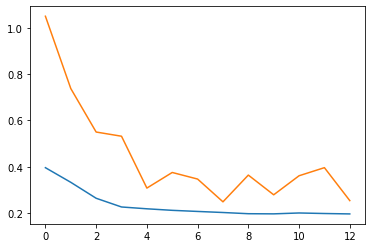

iteration:  11
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


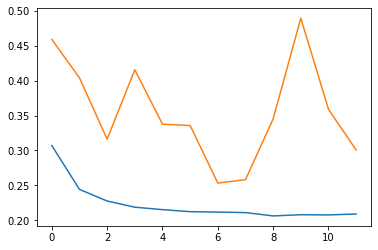

iteration:  12
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


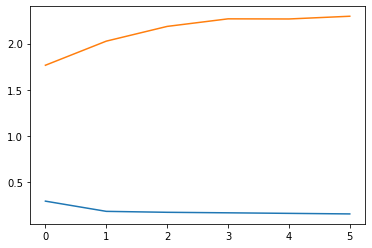

iteration:  13
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


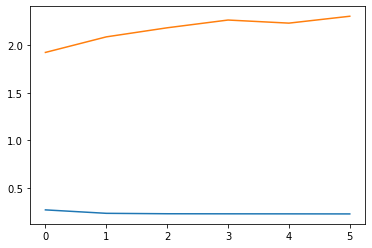

iteration:  14
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


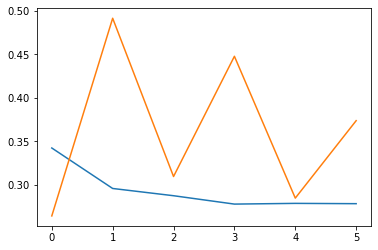

iteration:  15
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


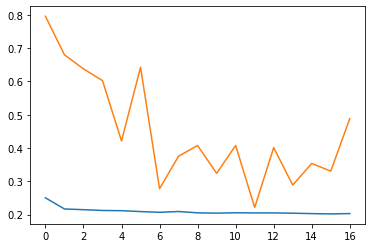

iteration:  16
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


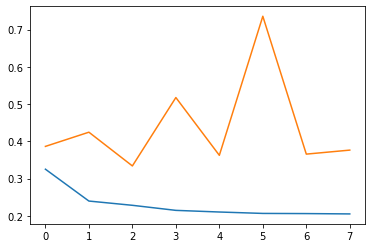

iteration:  17
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


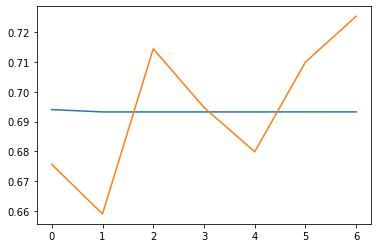

In [103]:

# Define number of trials in Random search.
n_trials=20
# Random state for sampling seeds.
np.random.seed(42)

# Variable to store the results.
param_list=mlp.mlp_param_sampler(n_trials, len(xtrain.columns),7,device)

normalization_list=['None','Zscore','MinMax','Median']
for normalization in normalization_list:
    i=0
    xtrain_aux=mlp_pipeline.normalization_transform(xtrain,normalization,cont_cols)
    xval_aux=mlp_pipeline.normalization_transform(xval,normalization,cont_cols)

    for params in param_list[2:]:

        # Fit pipeline
        print('iteration: ',i)
        
        model=mlp_pipeline.pipeline(device,xtrain_aux,xval_aux,ytrain,yval,params,'None',cont_cols)

        #Save the model
        joblib.dump(model,'fraud_mlp/mlp_simple{}{}.pkl'.format(normalization,i))

        i=i+1
    del xval_aux
    del xtrain_aux
    gc.collect()


In [8]:
max_auc=-1000
for i in range(0,50):
    link="lgbm_1/lgbm{}.pkl".format(i)
    file = open(link,'rb')
    model=joblib.load(link)
    predict=model.predict_proba(xval)[:,1]
    auc=skl.metrics.roc_auc_score(yval,predict)
    if max_auc<auc:
        max_auc=auc
        best_model=model
        
predict=model.predict_proba(xtest)[:,1]
auc=skl.metrics.roc_auc_score(ytest,predict)
print(auc)
roc=skl.metrics.roc_curve(ytest,predict,drop_intermediate=False)
recall_lgb=find_optimal_recall(roc[0],roc[1],roc[2],0.05)
print(recall_lgb)

0.9690620627527649
0.8181818181818182


In [59]:
x_test=encoder.transform(torch.tensor(xtest.values))

max_auc=-1000
for i in range(0,20):
    link="lgbm_1/lgbm_numenc{}.pkl".format(i)
    file = open(link,'rb')
    model=joblib.load(link)
    predict=model.predict_proba(x_val)[:,1]
    auc=skl.metrics.roc_auc_score(yval,predict)
    if max_auc<auc:
        max_auc=auc
        best_model=model
        
predict=model.predict_proba(x_test)[:,1]
auc=skl.metrics.roc_auc_score(ytest,predict)
print(auc)
roc=skl.metrics.roc_curve(ytest,predict,drop_intermediate=False)
recall_lgb=find_optimal_recall(roc[0],roc[1],roc[2],0.05)
print(recall_lgb)

0.8465593633999706
0.7272727272727273


In [38]:

max_auc_none=-1000
xtest_device=torch.tensor(xval.values).to(device)
for i in range(0,18):
    link="fraud_mlp/mlp_simpleNone{}.pkl".format(i)
    file = open(link,'rb')
    model = CPU_Unpickler(file).load()
    model.eval()
    output = model(mlp_pipeline.normalization_transform(xval,'None',xval.columns).float()).detach().numpy() 
    auc=skl.metrics.roc_auc_score(yval,output)
    if max_auc_none<auc:
        max_auc_none=auc
        best_model_none=model

max_auc_zscore=-1000
for i in range(0,18):
    link="fraud_mlp/mlp_simpleZscore{}.pkl".format(i)
    file = open(link,'rb')
    model.eval()
    model = CPU_Unpickler(file).load()
    predict = model(mlp_pipeline.normalization_transform(xval,'Zscore',xval.columns).float()).detach().numpy() 
    auc=skl.metrics.roc_auc_score(yval,predict)
    if max_auc_zscore<auc:
        max_auc_zscore=auc
        best_model_zscore=model

        
max_auc_med=-1000
for i in range(0,18):
    link="fraud_mlp/mlp_simpleMedian{}.pkl".format(i)
    file = open(link,'rb')
    model = CPU_Unpickler(file).load()
    model.eval()
    predict = model(mlp_pipeline.normalization_transform(xval,'Median',xval.columns).float()).detach().numpy()
    auc=skl.metrics.roc_auc_score(yval,predict)
    if max_auc_med<auc:
        max_auc_med=auc
        best_model_med=model
    #print(auc)
max_auc_minmax=-1000
for i in range(0,18):
    link="fraud_mlp/mlp_simpleMinMax{}.pkl".format(i)
    file = open(link,'rb')
    model = CPU_Unpickler(file).load()
    model.eval()
    predict = model(mlp_pipeline.normalization_transform(xval,'MinMax',xval.columns).float()).detach().numpy()
    auc=skl.metrics.roc_auc_score(yval,predict)
    if max_auc_minmax<auc:
        max_auc_minmax=auc
        best_model_minmax=model

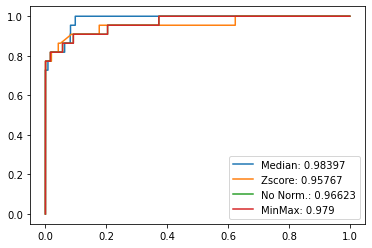

Recall ate FPR=5%
No Norm. 0.81818
Zscore 0.86364
Median 0.81818
MinMax 0.86364


In [42]:
best_model_none.eval()
best_model_zscore.eval()

best_model_med.eval()

roc_none=skl.metrics.roc_curve(ytest,best_model_none(mlp_pipeline.normalization_transform(xtest,'None',xtest.columns).float()).detach().numpy(),drop_intermediate=False)
roc_zscore=skl.metrics.roc_curve(ytest,best_model_zscore(mlp_pipeline.normalization_transform(xtest,'Zscore',xtest.columns).float()).detach().numpy(),drop_intermediate=False)
roc_med=skl.metrics.roc_curve(ytest,best_model_med(mlp_pipeline.normalization_transform(xtest,'Median',xtest.columns).float()).detach().numpy(),drop_intermediate=False)
roc_minmax=skl.metrics.roc_curve(ytest,best_model_minmax(mlp_pipeline.normalization_transform(xtest,'MinMax',xtest.columns).float()).detach().numpy(),drop_intermediate=False)


plt.plot(roc_med[0],roc_med[1],label="Median: {}".format(round(skl.metrics.roc_auc_score(ytest,best_model_med(mlp_pipeline.normalization_transform(xtest,'Median',xtest.columns).float()).detach().numpy()),5)))
plt.plot(roc_zscore[0],roc_zscore[1],label="Zscore: {}".format(round(skl.metrics.roc_auc_score(ytest,best_model_zscore(mlp_pipeline.normalization_transform(xtest,'Zscore',xtest.columns).float()).detach().numpy()),5)))
plt.plot(roc_none[0],roc_none[1],label="No Norm.: {}".format(round(skl.metrics.roc_auc_score(ytest,best_model_none(mlp_pipeline.normalization_transform(xtest,'None',xtest.columns).float()).detach().numpy()),5)))
plt.plot(roc_none[0],roc_none[1],label="MinMax: {}".format(round(skl.metrics.roc_auc_score(ytest,best_model_minmax(mlp_pipeline.normalization_transform(xtest,'MinMax',xtest.columns).float()).detach().numpy()),5)))


plt.legend(loc="lower right")
plt.show()


recall_none=find_optimal_recall(roc_none[0],roc_none[1],roc_none[2],0.05)
recall_zscore=find_optimal_recall(roc_zscore[0],roc_zscore[1],roc_zscore[2],0.05)
recall_med=find_optimal_recall(roc_med[0],roc_med[1],roc_med[2],0.05)
recall_minmax=find_optimal_recall(roc_minmax[0],roc_minmax[1],roc_minmax[2],0.05)

print("Recall ate FPR=5%")
print("No Norm.",round(recall_none,5))
print("Zscore",round(recall_zscore,5))
print("Median",round(recall_med,5))
print("MinMax",round(recall_minmax,5))


# Numerical Encodings

In [7]:
import rtdl.rtdl.data as data
import mlp_pipeline

In [8]:
#For the categorical data, we will be using the Catboost Encoder, which has been shown to work the best for this dataset
mlp_params=mlp.mlp_param_sampler(20, len(xtrain.columns),7,device)

encoder=data.PiecewiseLinearEncoder('decision_tree',dict(n_bins=4,regression='False', tree_kwargs={'min_samples_leaf': 256}),stack=False)
encoder.fit(torch.tensor(xtrain.values),torch.tensor(ytrain.values)) #the device count fraud feature is constant, and so cannot be fed to this encoder
joblib.dump(encoder, "fraud_mlp/numerical_encoder.pkl")
x_train=encoder.transform(torch.tensor(xtrain.values))
x_val=encoder.transform(torch.tensor(xval.values))
i=0
for param in mlp_params:
    
        
    model=mlp_pipeline.pipeline(device,x_train,x_val,ytrain,yval,param,'None',xtrain.columns.difference(['device_fraud_count']))
    joblib.dump(model,"fraud_mlp/mlp1_encoded{}_dim{}.pkl".format(i,4) )
    i=i+1

    gc.collect()


----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 

EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping
----------Method:  None -------------
Train size:  227844 ; Number of 0:  227427 ; Number of 1: 417
Val size:  28480 ; Number of 0:  28427 ; Number of 1: 53
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


In [36]:
joblib.dump(encoder,'fraud_mlp/numerical_encoder.pkl')

['fraud_mlp/numerical_encoder.pkl']

In [9]:
max_auc_none=0
res=np.zeros([7,30])
best_models=[]
max_auc=0

for i in range(0,20):
    x_val=encoder.transform(torch.tensor(xval.values))

    model=joblib.load("fraud_mlp/mlp1_encoded{}_dim4.pkl".format(i))
    model.eval()
    
    output = model(x_val.float()).detach().numpy() 
    auc=skl.metrics.roc_auc_score(yval,output)
    if auc>max_auc:
        best_model=model
        max_auc=auc
            
    
#Results for test set:
j=0


x_test=encoder.transform(torch.tensor(xtest.values))
best_model.eval()
output=best_model(x_test.float()).detach().numpy() 
auc=skl.metrics.roc_auc_score(ytest,output)
roc=skl.metrics.roc_curve(ytest,output,drop_intermediate=False)
recall=find_optimal_recall(roc[0],roc[1],roc[2],0.05)
    
print("Dim ",4,"-----",round(auc,5),"&",round(recall,6))
j=j+1

Dim  4 ----- 0.97812 & 0.909091
